# Gagandeep Bhatia: Retail Data analysis

# Importing the required libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns


# Strating with the Data Cleaning Process

Loading the dataset which we have to work on and displaying the head of the dataset (ie, the first five rows)

In [2]:
df = pd.read_csv ("D:\GRIP\SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


Checking if there is any null values in the dataset

In [3]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

As we can see there are no null values in the dataset , hence we can move forward

Checking the data types of all the columns

In [4]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

Getting to know all the columns in the dataset

In [5]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

Here, we first remove all the duplicates as they will mess with our analysis

In [6]:
df.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


Now the data is almost cleaned. we just have to remove the postal code column as it is of no use to us and as we have to find the relationship between the variables , it will be of no use in the analysis which is done in the next step.

In [7]:
df_cleaned = df.drop('Postal Code', axis=1)
df_cleaned.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Starting with the analysis

Finding the correlation between the variables (Sales , Quantity , Discount , Profit) 

In [8]:
df_cleaned.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


Here, we can see that there is a very strong correlation between Sales and the Profit column.

Similarly, finding the covariance between the variables (Sales , Quantity , Discount , Profit)

In [9]:
df_cleaned.cov()

,Sales,Quantity,Discount,Profit
Sales,388434.455308,278.459923,-3.627228,69944.096586
Quantity,278.459923,4.951113,0.003961,34.534769
Discount,-3.627228,0.003961,0.042622,-10.615173
Profit,69944.096586,34.534769,-10.615173,54877.798055


Here, we can see that the covariance between Sales and Quantity column as well as the Sales and Profit column is strong.

Representing the relationship between the unique count of the products and the region.

In [10]:
#getting th count of unique values for the four regions
df_cleaned['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

C:\Users\Gagandeep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Count per Region'}, xlabel='Region', ylabel='count'>

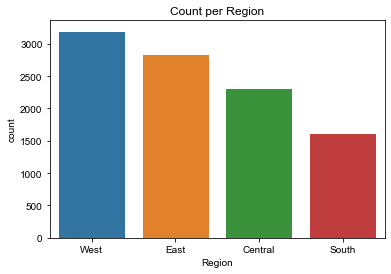

In [11]:
plt.title('Count per Region')
sns.set_style('darkgrid')
sns.countplot(df_cleaned['Region'],order = df_cleaned['Region'].value_counts().index)

From the representation above , we can see that the highest number of stores are in the west region , whereas lowest in the south region.

Similarly, representing the relationship between the unique counts and the states.

In [12]:
#getting the unique counts for each state.
df_cleaned['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

C:\Users\Gagandeep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Count per State'}, xlabel='State', ylabel='count'>

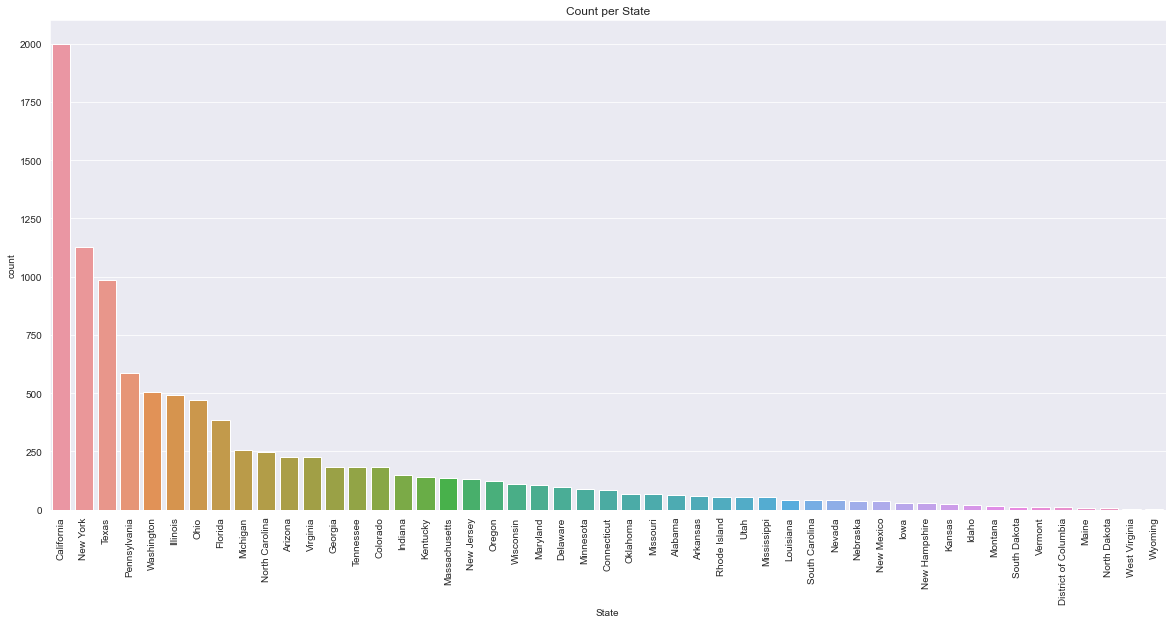

In [13]:
plt.figure(figsize=(20,9))
plt.xticks(rotation = 90)
plt.title('Count per State')
sns.set_style('darkgrid')
sns.countplot(df_cleaned['State'],order = df_cleaned['State'].value_counts().index)


Here, we can see that california, New york and Texas are the top three states as per the number of stores whereas North Dakota, West Virginia and Wyoming are the bottom three states. 

We can also see the unique count for the top ten cities 



In [14]:
city = df['City'].value_counts()
city.head(10)

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Name: City, dtype: int64

we can see that the highest count is of New York City followed by LA.

Now we can find the relationships between the unique counts for each type of the products

<AxesSubplot:title={'center':'Count per Category'}, xlabel='Category', ylabel='count'>

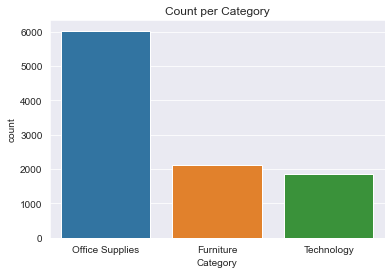

In [15]:
plt.title('Count per Category')
sns.set_style('darkgrid')
sns.countplot(x = df_cleaned['Category'], order = df_cleaned['Category'].value_counts().index)

We can see that the highest count is for the office supplies , whereas the count for the furniture category and the technology is pretty much the same.

Similarly, the relation between the unique counts for each sub- category is as follows.

C:\Users\Gagandeep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Count per Sub-Category'}, xlabel='Sub-Category', ylabel='count'>

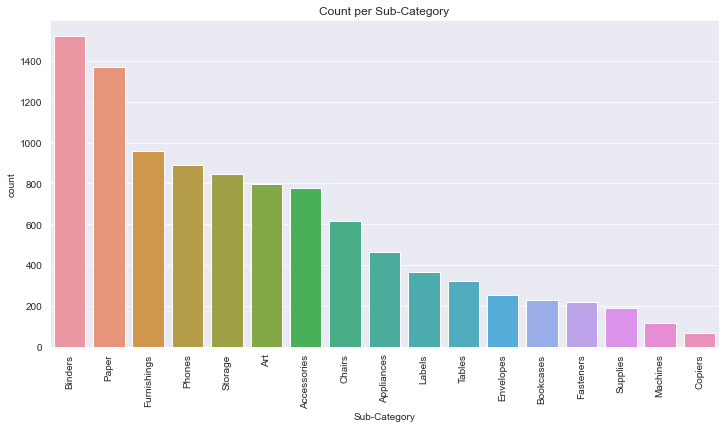

In [16]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90) 
plt.title('Count per Sub-Category')
sns.set_style('darkgrid') 
sns.countplot(df_cleaned['Sub-Category'],order = df_cleaned['Sub-Category'].value_counts().index)

Here we can see that the binders and the papers are two of the most selling products of the comapany. We can increase the avaliability of these products as well as their prices for better profits.

C:\Users\Gagandeep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Count per Segment'}, xlabel='Segment', ylabel='count'>

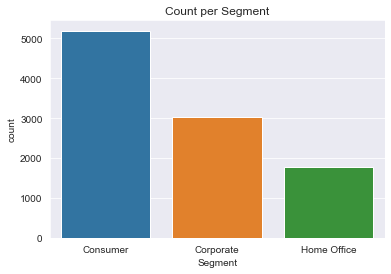

In [17]:
plt.title('Count per Segment')
sns.set_style('darkgrid')
sns.countplot(df_cleaned['Segment'])

Here we can see that the main buyer for our products is the consumer segment. Hence, we can advertise our products using social media and internet to gather more buyers.

<AxesSubplot:title={'center':'Sales VS Sub-category'}, xlabel='Sub-Category', ylabel='Sales'>

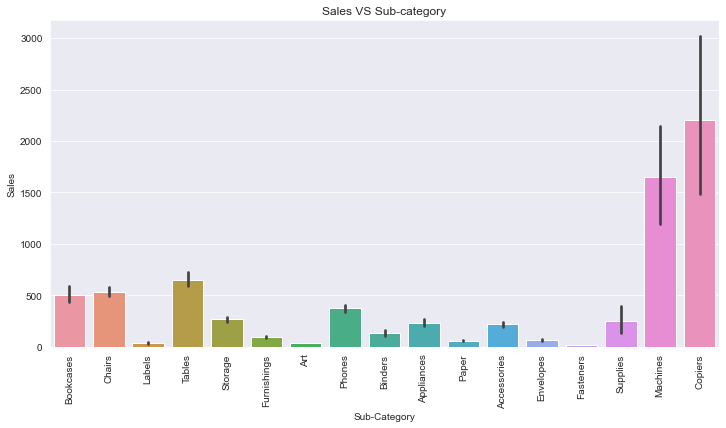

In [18]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title('Sales VS Sub-category')
sns.set_style('darkgrid') 
sns.barplot(x=df_cleaned['Sub-Category'], y=df_cleaned['Sales'])

Using this graph we can see the total sales for each sub category of the products

<AxesSubplot:title={'center':'Profit VS State'}, xlabel='State', ylabel='Profit'>

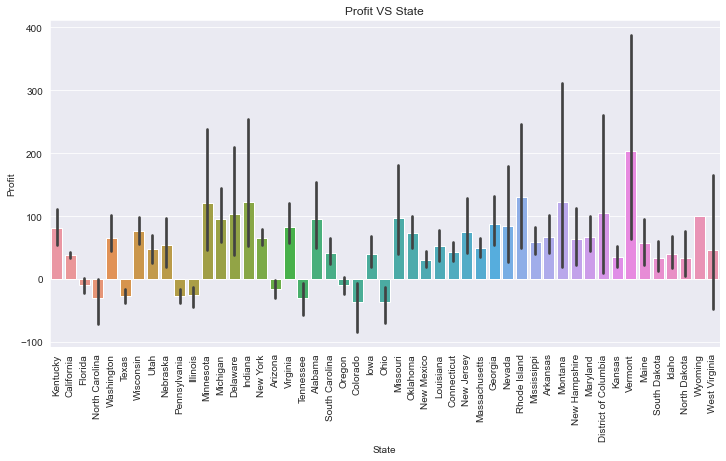

In [19]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90) 
plt.title('Profit VS State')
sns.set_style('darkgrid') 
sns.barplot(x=df_cleaned['State'], y=df_cleaned['Profit'])

In the above graph we can see there are many states having their profits in negative figures, hence we can work on that

<AxesSubplot:title={'center':'Sales of Top 10 Cities'}, xlabel='City', ylabel='Total sum of Sales'>

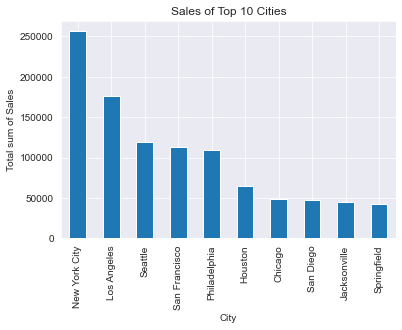

In [20]:
top10 = df_cleaned.groupby('City')['Sales'].sum().sort_values(ascending = False).iloc[0:10]
plt.title('Sales of Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Total sum of Sales')
top10.plot(kind='bar')

Here, we can see the sales of the top 10 cities. Hence, to gain more profits in these cities we can increase the number of stores and the product avaliability in these 10 cities. 

C:\Users\GAGAND~1\AppData\Local\Temp/ipykernel_14204/933436766.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  overview = df_cleaned.groupby('State')['Profit','Sales'].sum()


Text(0.5, 1.0, 'Sales and Profit overview per State')

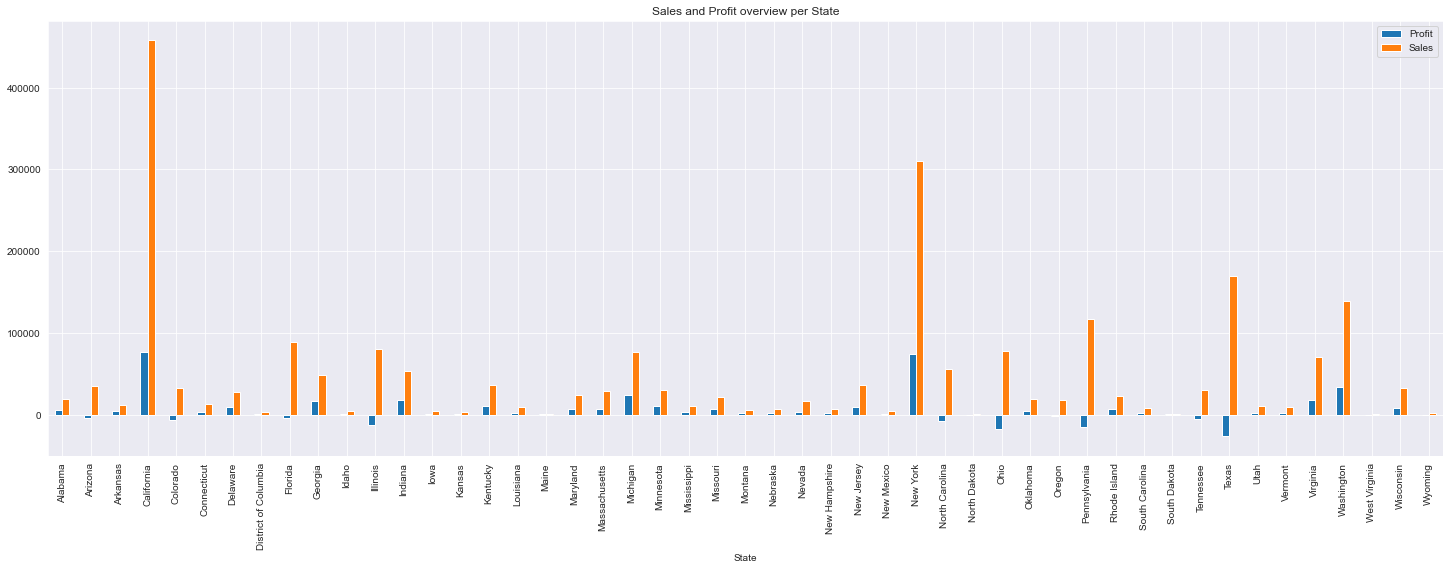

In [21]:
overview = df_cleaned.groupby('State')['Profit','Sales'].sum()
overview.plot(kind='bar',figsize=(25,8))
plt.title('Sales and Profit overview per State')

As we can see in the above representation , California and New York has good amount of sales and if we compare this with the number of stores in the region where these two cities belong , we can see that the west and the north region has the highest number of stores.
But; 
Texas has a good amount of sales. But is we recall and take a look at the count per region graph , we can see that the south region has the lowest number of stores.
Hence, the number of stores in the south region can be increased in order to increase the sales. 

Similarly we can see that Illinois and texas though being a majour state and having many important cities have a good amount of sales but , the profits is in negative. hence we have to work on this as well.

<AxesSubplot:title={'center':'Sales VS State'}, xlabel='State', ylabel='Sales'>

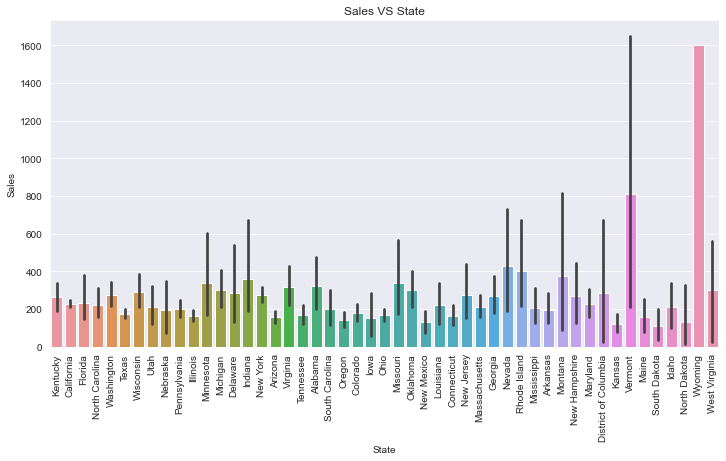

In [22]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90) 
plt.title('Sales VS State')
sns.set_style('darkgrid') 
sns.barplot(x=df_cleaned['State'], y=df_cleaned['Sales'])

As we can see from this graph and the profits vs states graph, the sales and profits in vermont are pretty good, but from the counts vs state graph we can see that the number of stores in vermont are very less, hence we can increase the number of stores in that state with a small amount and if the sales improve even more , then we can make it one of the main states for the sales of our products.

# Insights gathered from the analysis

Firstly, texas being a very productive state having a large number of sales but its region ie. South has very less number of stores. Hence, the number of stores in the region can be increased.

The number of stores and the product avaliability in the top 10 cities can be increased as well.

Vermont being a state with good profit and sales but very less amount of stores can be worked upon.

The avaliability and the price of products like binders and papers which are the most sold products can be increased for more sales and profits.

We have to work on the cities and states having negative figures of profits.

As the main and the maximum number of buyers are from the consumer segment, we can have better advertisments of our products using social media and internet to gather more buyers.